In [26]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
df = quandl.get('NSE/TATAPOWER', start_date='2017-01-01')['Close']

In [45]:
def analysis(df,size=20):
    rm = df.rolling(window = size).mean()
    rs = df.rolling(window=size).std()
    upper_band = rm + 2*rs
    lower_band = rm - 2*rs
    plt.figure(figsize=(15,10))
    plt.plot(df,'g',rm,'b',upper_band,'r',lower_band,'r')
    plt.title('Bollinger Band')
    
    cum_ret = df.copy()
    cum_ret = df/df[0] - 1
    plt.figure(figsize=(15,5))
    plt.plot(cum_ret)
    plt.title('Cumalative Returns')
    
    daily_returns = df.copy()
    daily_returns[1:] = (df[1:]/df[:-1].values) - 1
    daily_returns[0] = 0
    plt.figure(figsize=(15,3))
    plt.plot(daily_returns)
    plt.title('Daily Returns')
    
    plt.figure()
    daily_returns.hist(bins=20)
    dr_mean = daily_returns.mean()
    dr_std = daily_returns.std()
    plt.axvline(dr_mean, color = 'w' , linestyle='dashed' , linewidth=2)
    plt.axvline(dr_mean + dr_std, color = 'r' , linestyle='dashed' , linewidth=2)
    plt.axvline(dr_mean - dr_std, color = 'r' , linestyle='dashed' , linewidth=2)
    plt.title('Daily Returns Hist')
    plt.show()
    
    print("Kurtosis: " ,daily_returns.kurtosis())
    print("Skewness: " ,daily_returns.skew())

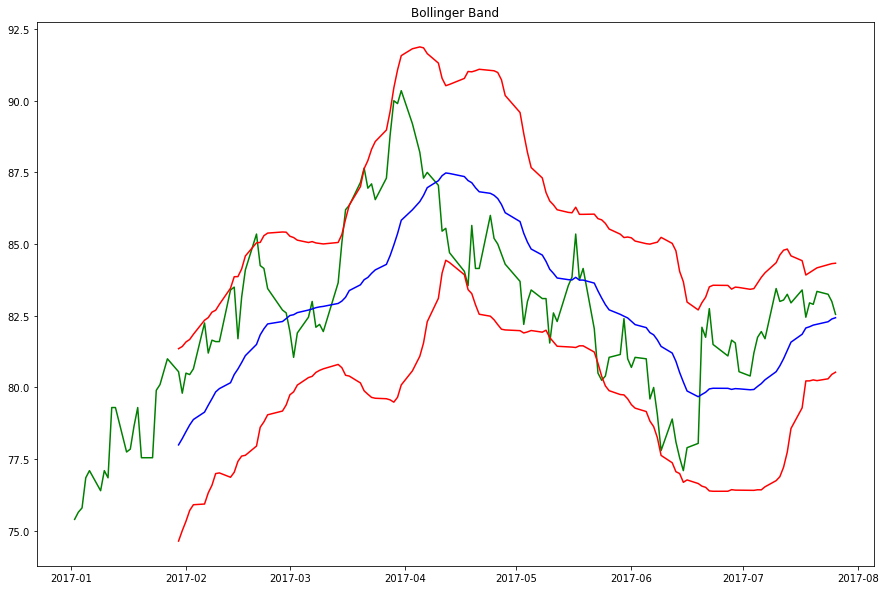

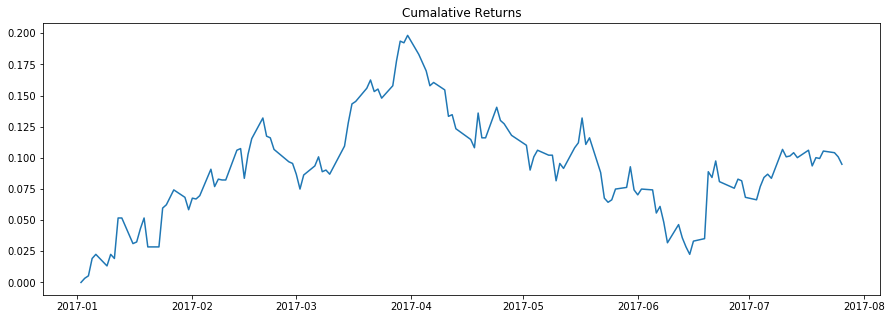

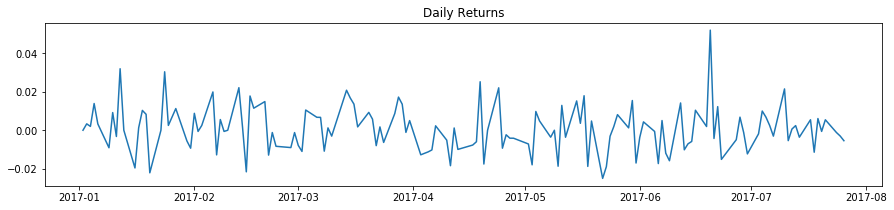

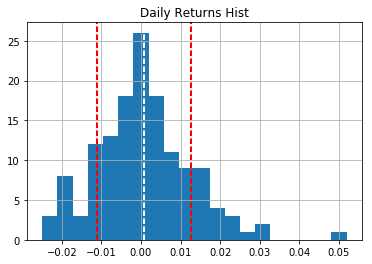

Kurtosis:  1.76764958407
Skewness:  0.672219459901


In [60]:
analysis(df)